In [1]:
import os
os.chdir("..")

from pprint import pprint
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tuxai.dataset import Dataset, Columns
from tuxai.misc import config_logger
from tuxai.report import model_metrics, Report, FeatureImportanceReport

config_logger()
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100

# fir = FeatureImportanceReport(use_cache="fi_const_2023")
# fir_no = FeatureImportanceReport(use_cache="fi_const_2023_no", drop_outliers=True)

# MAPE, MAE & other metrics, with and without outliers

In [7]:
from tuxai.misc import cache

key_1 = "xgboost_model_2023_02_01__with_outliers"
key_2 = "xgboost_model_2023_02_01__without_outliers"
# c = cache()
# del c[key_1]
# del c[key_2]

def get_xgboost_model_report(drop_outliers, key):
    c = cache()
    if key in c:
        df = c[key]
    else:
        report = Report()
        df = report.xgboost_model(drop_outliers=drop_outliers)
        c[key] = df
    return df

rep_with_outliers = get_xgboost_model_report(drop_outliers=False, key=key_1)
rep_without_outliers = get_xgboost_model_report(drop_outliers=True, key=key_2)



## 1 - MAPE

<AxesSubplot: >

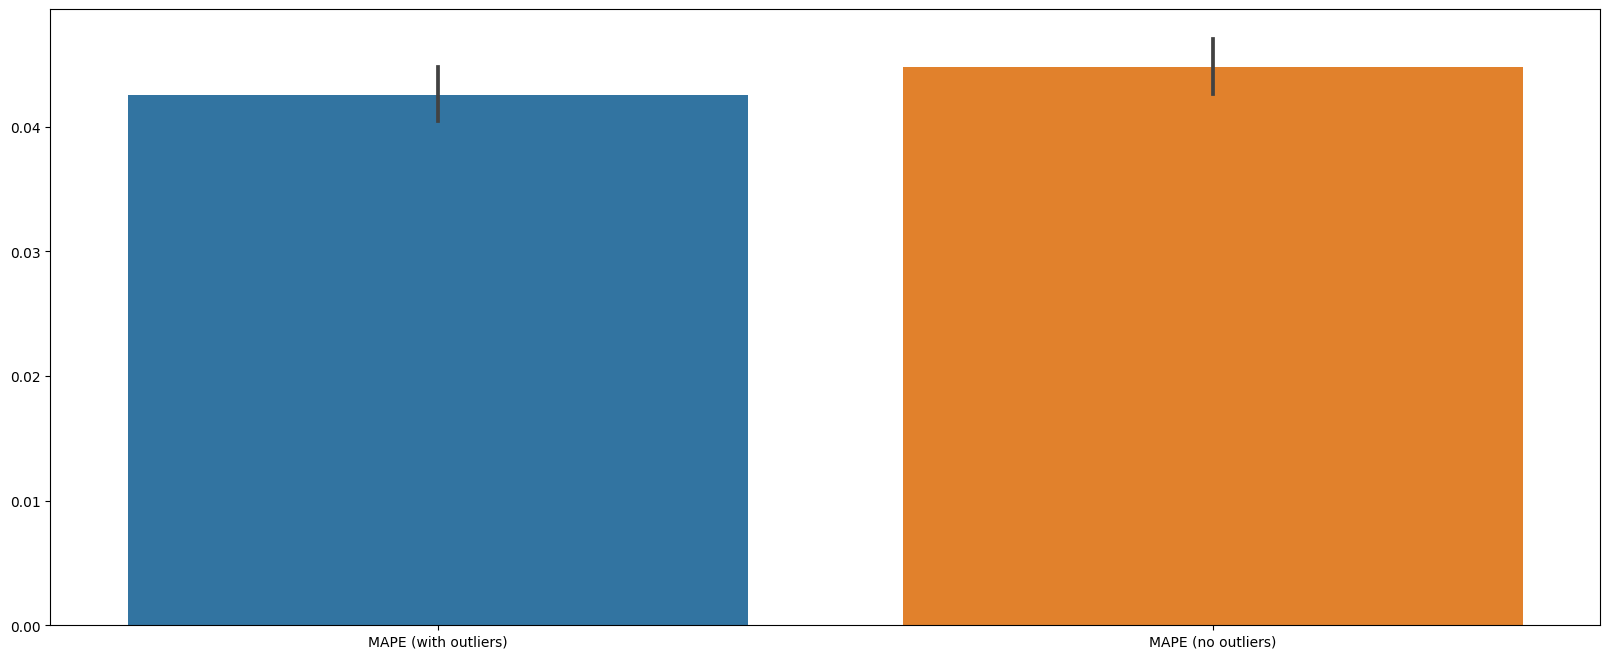

In [24]:
idx_cols = ["version", "target", "collinearity"]
out_cols = ["MAPE (with outliers)", "MAPE (no outliers)"]
df = pd.concat([
    rep_with_outliers.set_index(idx_cols)["mean absolute percentage error"],
    rep_without_outliers.set_index(idx_cols)["mean absolute percentage error"]
], axis=1)
df.columns = out_cols
df = df.reset_index()
df.groupby("target")

plt.subplots(figsize=(20, 8))
sns.barplot(data=df.set_index(idx_cols))



## 2 - MAE

<AxesSubplot: >

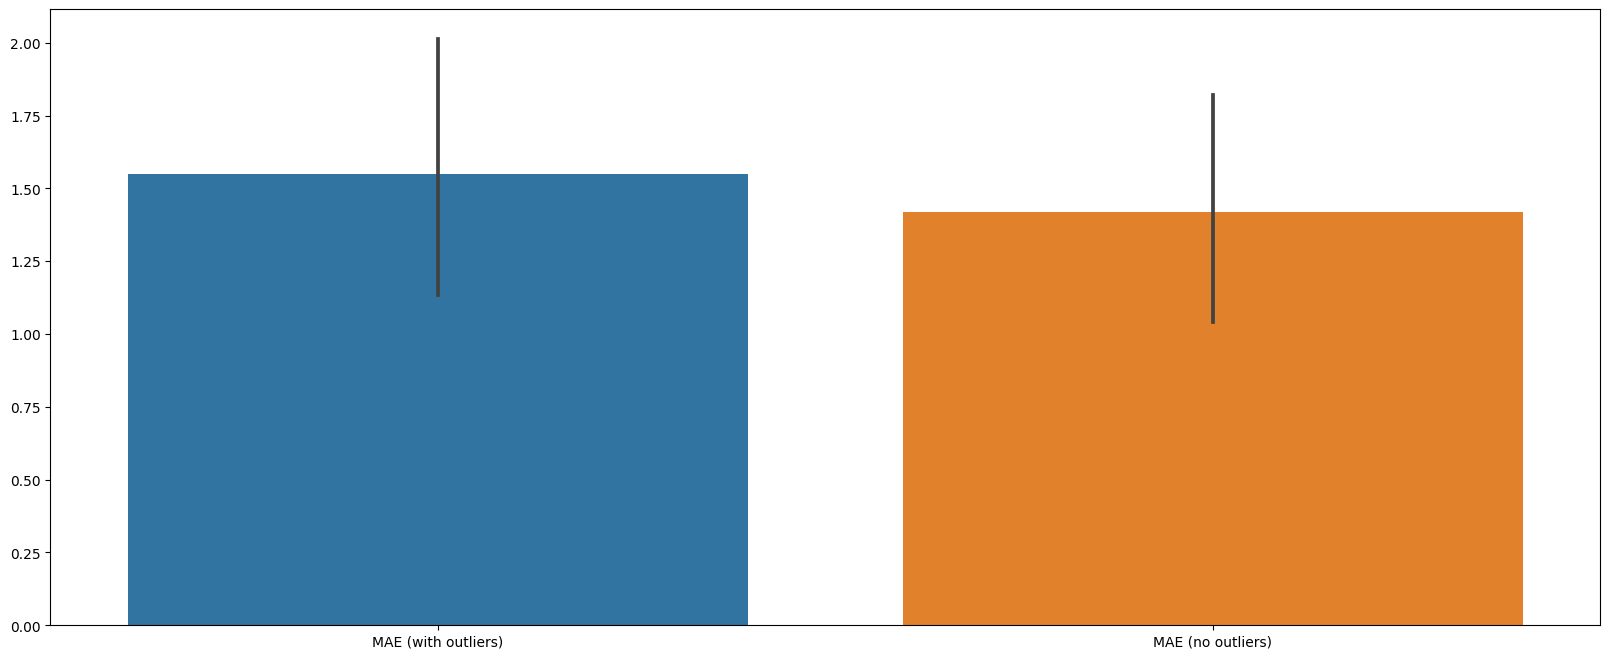

In [25]:
idx_cols = ["version", "target", "collinearity"]
out_cols = ["MAE (with outliers)", "MAE (no outliers)"]
df = pd.concat([
    rep_with_outliers.set_index(idx_cols)["mean absolute error"],
    rep_without_outliers.set_index(idx_cols)["mean absolute error"]
], axis=1)
df.columns = out_cols
df = df.reset_index()
df.groupby("target")

plt.subplots(figsize=(20, 8))
sns.barplot(data=df.set_index(idx_cols))

## remaining metrics

In [38]:

import re
r = re.compile(r"(?:(?<=\s)|^)(?:[a-z]|\d+)", re.I)
df = pd.concat([
    rep_with_outliers.groupby(idx_cols).first().rename(columns={col: f"{''.join(r.findall(col)).upper()} (with)" for col in rep_with_outliers.columns}),
    rep_without_outliers.groupby(idx_cols).first().rename(columns={col: f"{''.join(r.findall(col)).upper()} (without)" for col in rep_without_outliers.columns})
], axis=1)
df = df[sorted(df.columns)]
df

MAE (with)  MAE (without)  MAPE (with)  \
version target        collinearity                                           
4.13    BZIP2-vmlinux False           0.394787       0.380136     0.025507   
                      True            0.401101       0.644558     0.025773   
        GZIP-vmlinux  False           0.388014       0.379183     0.034098   
                      True            0.394849       0.705538     0.034815   
        LZ4-vmlinux   False           0.482881       0.469830     0.036591   
                      True            0.489464       0.825796     0.037011   
        LZMA-vmlinux  False           0.302008       0.292484     0.031869   
                      True            0.305558       0.546782     0.032055   
        LZO-vmlinux   False           0.441625       0.427634     0.035539   
                      True            0.446353       0.770526     0.035982   
        XZ-vmlinux    False           0.281721       0.276126     0.031293   
                      True            0.289151       0.539369     0.032191   
        vmlinux       False           3.093388       2.554318     0.056787   
                      True            3.124976       2.869677     0.057614   
4.15    BZIP2-vmlinux False           0.615910       0.610299     0.030441   
                      True            0.630568       0.628520     0.031253   
        GZIP-vmlinux  False           0.612907       0.590675     0.039537   
                      True            0.612500       0.607968     0.040047   
        LZ4-vmlinux   False           0.802105       0.779972     0.041985   
                      True            0.819552       0.806522     0.042889   
        LZMA-vmlinux  False           0.451786       0.445453     0.036424   
                      True            0.463591       0.452166     0.037635   
        LZO-vmlinux   False           0.721825       0.698710     0.041185   
                      True            0.741749       0.707864     0.042111   
        XZ-vmlinux    False           0.434452       0.421865     0.037310   
                      True            0.432524       0.422076     0.037485   
        vmlinux       False           6.768694       5.494673     0.063369   
                      True            6.733527       5.521103     0.063402   
4.20    BZIP2-vmlinux False           0.681345       0.688708     0.033220   
                      True            0.689906       0.804882     0.033458   
        GZIP-vmlinux  False           0.648788       0.648121     0.041026   
                      True            0.664057       0.768510     0.041986   
        LZ4-vmlinux   False           0.860063       0.869413     0.043313   
                      True            0.879915       1.061167     0.044298   
        LZMA-vmlinux  False           0.483095       0.486508     0.038124   
                      True            0.495547       0.584880     0.039319   
        LZO-vmlinux   False           0.781423       0.771630     0.043014   
                      True            0.786841       0.921872     0.043080   
        XZ-vmlinux    False           0.456632       0.455277     0.038294   
                      True            0.465035       0.551181     0.038799   
        vmlinux       False           6.809774       6.216186     0.065961   
                      True            6.855829       6.236887     0.066971   
5.00    BZIP2-vmlinux False           0.703911       0.689565     0.033263   
                      True            0.713321       0.693521     0.033963   
        GZIP-vmlinux  False           0.685721       0.671020     0.042193   
                      True            0.692885       0.679816     0.042719   
        LZ4-vmlinux   False           0.888925       0.905121     0.044011   
                      True            0.906274       0.915749     0.044438   
        LZMA-vmlinux  False           0.525345       0.506630     0.040172   
                      True            0.520046       0.508

<AxesSubplot: >

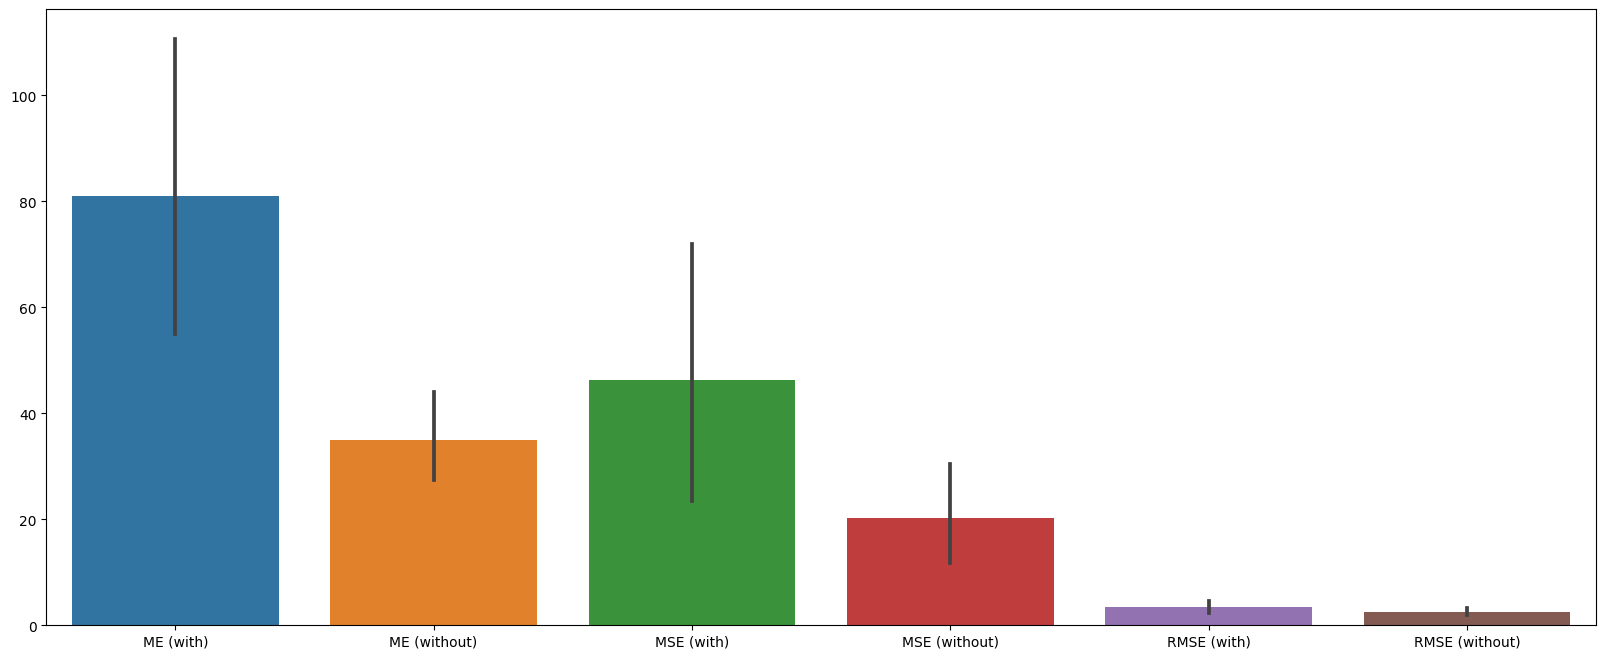

In [40]:
plt.subplots(figsize=(20, 8))
sns.barplot(data=df[[col for col in df.columns if not col.startswith("MA")]])

# Feature importance

In [65]:
from tuxai.misc import get_config

fir_with_outliers = FeatureImportanceReport(use_cache="fi_const_2023", drop_outliers=False)
fir_without_outliers = FeatureImportanceReport(use_cache="fi_const_2023_no", drop_outliers=True)

dfs = {
    target: fir_with_outliers.options_always_importants(target=target, rank=99999, collinearity=True, merge_groups=True, allow_version_gap=False).set_index("options")
    for target in get_config()["report"]["xgboost_targets"]
}

2023-01-31 15:33:54,756 :: INFO :: tuxai.report :: loading feature importance data from cache: fi_const_2023
2023-01-31 15:34:18,629 :: INFO :: tuxai.report :: loading feature importance data from cache: fi_const_2023_no


  0%|          | 0/8665 [00:00<?, ?it/s]

  0%|          | 0/8665 [00:00<?, ?it/s]

  0%|          | 0/8665 [00:00<?, ?it/s]

  0%|          | 0/8665 [00:00<?, ?it/s]

  0%|          | 0/8665 [00:00<?, ?it/s]

  0%|          | 0/8665 [00:00<?, ?it/s]

  0%|          | 0/8665 [00:00<?, ?it/s]

## top list vmlinux (sorted by rank mean)

In [69]:
dfs["vmlinux"]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08
options,,,,,,,
nb_yes,0,1,1,0,0,0,0
"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",1,0,0,1,1,1,1
DEBUG_INFO,2,2,2,2,2,2,2
UBSAN_SANITIZE_ALL,4,4,4,4,4,8,7
DEBUG_INFO_REDUCED,5,6,5,5,6,5,4
...,...,...,...,...,...,...,...
NLS_ISO8859_15,8895,8948,9671,9758,10319,10711,10908
INTEL_POWERCLAMP,8891,8943,9666,9783,10315,10709,10905
USB_KAWETH,8898,8950,9674,9760,10321,10714,10912


## Raw top lists for each target, sorted by rank mean (across versions)

In [71]:
df = pd.DataFrame.from_dict({k: pd.Series(v.index) for k, v in dfs.items()})
df.iloc[:20]

,vmlinux,GZIP-vmlinux,BZIP2-vmlinux,LZMA-vmlinux,XZ-vmlinux,LZO-vmlinux,LZ4-vmlinux
0,nb_yes,nb_yes,nb_yes,nb_yes,nb_yes,nb_yes,nb_yes
1,"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",UBSAN_SANITIZE_ALL,UBSAN_SANITIZE_ALL,UBSAN_SANITIZE_ALL,UBSAN_SANITIZE_ALL,UBSAN_SANITIZE_ALL,GCOV_PROFILE_ALL
2,DEBUG_INFO,GCOV_PROFILE_ALL,GCOV_PROFILE_ALL,GCOV_PROFILE_ALL,GCOV_PROFILE_ALL,GCOV_PROFILE_ALL,UBSAN_SANITIZE_ALL
3,UBSAN_SANITIZE_ALL,KCOV_INSTRUMENT_ALL,"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",KCOV_INSTRUMENT_ALL,UBSAN_ALIGNMENT,"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)","RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)"
4,DEBUG_INFO_REDUCED,UBSAN_ALIGNMENT,KCOV_INSTRUMENT_ALL,UBSAN_ALIGNMENT,"PRINTK, PRINTK_NMI",KCOV_INSTRUMENT_ALL,KCOV_INSTRUMENT_ALL
5,"RANDOMIZE_BASE(4.15, 4.20, 5.00, 5.04, 5.07, 5.08), X86_NEED_RELOCS","PRINTK, PRINTK_NMI",UBSAN_ALIGNMENT,"PRINTK, PRINTK_NMI",KCOV_INSTRUMENT_ALL,UBSAN_ALIGNMENT,UBSAN_ALIGNMENT
6,DEBUG_INFO_SPLIT,"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)","PRINTK, PRINTK_NMI",READABLE_ASM,READABLE_ASM,"PRINTK, PRINTK_NMI","PRINTK, PRINTK_NMI"
7,GCOV_PROFILE_ALL,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING",READABLE_ASM,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING","BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING","BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING",READABLE_ASM
8,UBSAN_ALIGNMENT,READABLE_ASM,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING","RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)","RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",READABLE_ASM,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING"
9,KCOV_INSTRUMENT_ALL,DYNAMIC_DEBUG,DYNAMIC_DEBUG,DYNAMIC_DEBUG,DYNAMIC_DEBUG,DYNAMIC_DEBUG,DYNAMIC_DEBUG


# Compare top vmlinux list with top compressed lists

In [74]:
from collections import defaultdict

# keep top 30 options for each target
# options = pd.unique(df.iloc[:30].values.ravel('K'))

options = pd.unique(df.values.ravel('K'))
d = defaultdict(dict)

for target in df.columns:
    for option in options:
        if len(ranks := df[target][df[target] == option]) > 0:
            d[option][target] = ranks.index[0]
df_all = pd.DataFrame.from_dict(d, orient="index")

In [79]:
df_vmlinux = df_all.sort_values("vmlinux").iloc[:30]
df_vmlinux

,vmlinux,GZIP-vmlinux,BZIP2-vmlinux,LZMA-vmlinux,XZ-vmlinux,LZO-vmlinux,LZ4-vmlinux
nb_yes,0,0,0,0,0,0,0
"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",1,6,3,8,8,3,3
DEBUG_INFO,2,2743,3401,3796,1752,1185,3873
UBSAN_SANITIZE_ALL,3,1,1,1,1,1,2
DEBUG_INFO_REDUCED,4,3683,3569,3576,4237,3734,4478
"RANDOMIZE_BASE(4.15, 4.20, 5.00, 5.04, 5.07, 5.08), X86_NEED_RELOCS",5,170,161,170,176,32,10
DEBUG_INFO_SPLIT,6,529,330,371,304,459,474
GCOV_PROFILE_ALL,7,2,2,2,2,2,1
UBSAN_ALIGNMENT,8,4,5,4,3,5,5
KCOV_INSTRUMENT_ALL,9,3,4,3,5,4,4


## deltas

In [ ]:
for target in df_all.columns:
    df_vmlinux[target].apply

## Compare Gzip with others

In [77]:
df_gzip = df_all.sort_values("GZIP-vmlinux").iloc[:30]
df_gzip

,vmlinux,GZIP-vmlinux,BZIP2-vmlinux,LZMA-vmlinux,XZ-vmlinux,LZO-vmlinux,LZ4-vmlinux
nb_yes,0,0,0,0,0,0,0
UBSAN_SANITIZE_ALL,3,1,1,1,1,1,2
GCOV_PROFILE_ALL,7,2,2,2,2,2,1
KCOV_INSTRUMENT_ALL,9,3,4,3,5,4,4
UBSAN_ALIGNMENT,8,4,5,4,3,5,5
"PRINTK, PRINTK_NMI",11,5,6,5,4,6,6
"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",1,6,3,8,8,3,3
"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING",14,7,8,7,7,7,8
READABLE_ASM,22,8,7,6,6,8,7
DYNAMIC_DEBUG,15,9,9,9,9,9,9


ValueError: Could not interpret input 'rank'

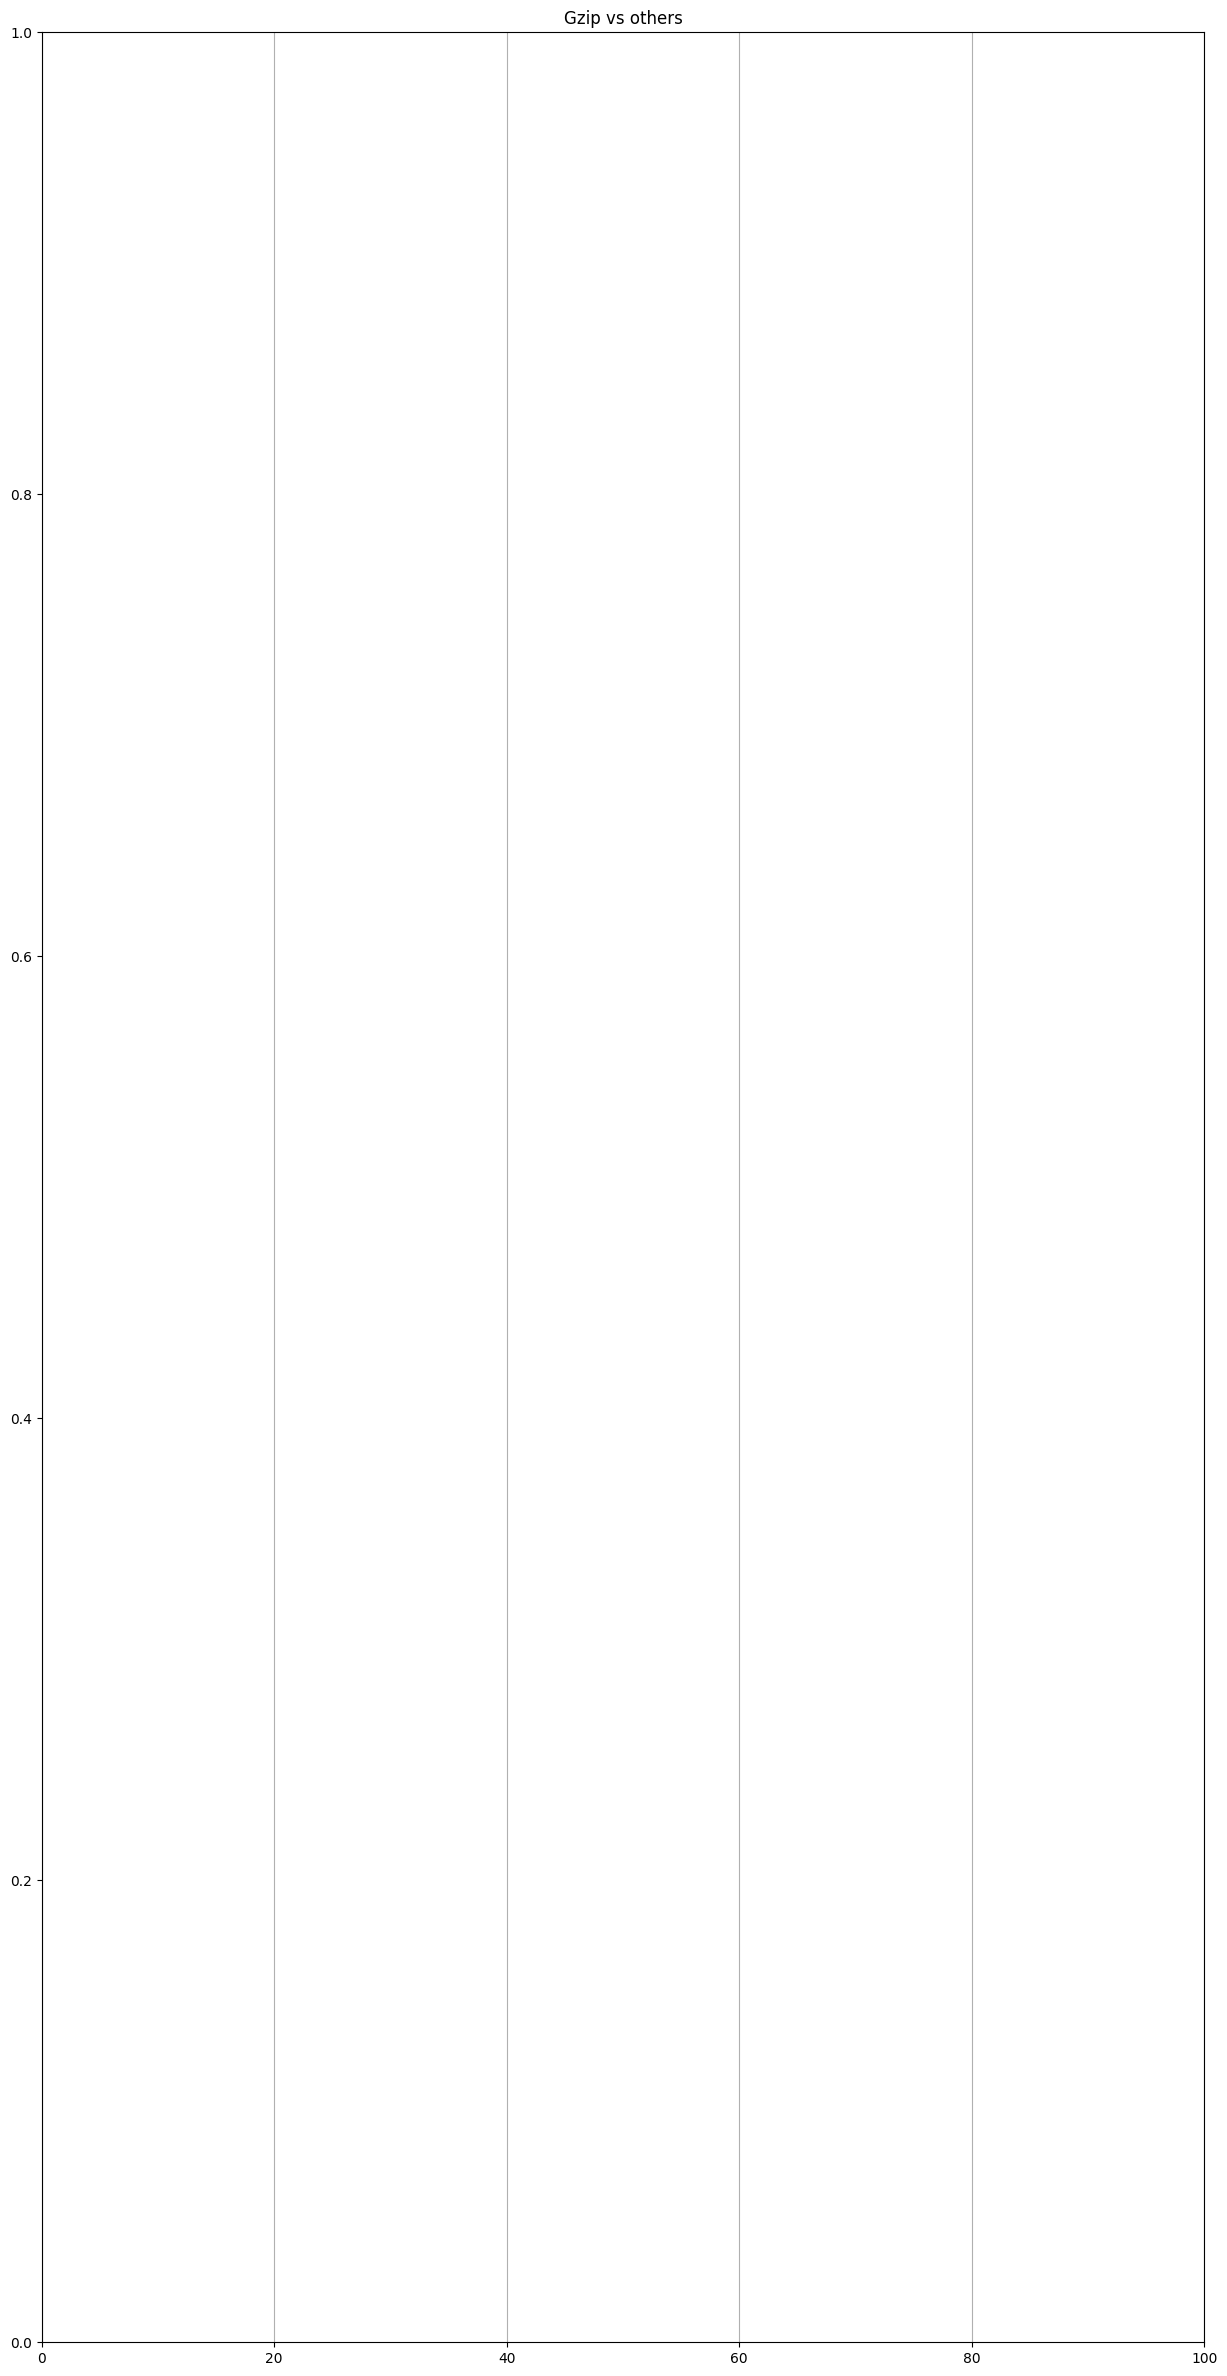

In [78]:
fig, ax = plt.subplots(figsize=(15, 30))
plt.xlim(0, 100)
ax.xaxis.grid(True)
ax.set(ylabel="")
plt.title("Gzip vs others")

sns.boxplot(
    x="rank",
    y="option",
    data=df_gzip,
    whis=[0, 100],
    width=0.6,
    palette="vlag",
    ax=ax,
)